In [19]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error, r2_score

In [20]:
dataFrame = pd.read_csv('data/global-food.csv')

In [21]:
dfFood = dataFrame.query('Year==2018')[['Country', 'Food supply (Protein g per capita per day)', 'Food supply (kcal per capita per day)']]
dfFood.index = range(dfFood.shape[0])
dfFood.columns = ['Country', 'Protein', 'Calories']
dfFood

,Country,Protein,Calories
0,Afghanistan,55.520000,2040.000000
1,Africa,68.112344,2604.253905
2,Albania,115.739998,3360.000000
3,Algeria,91.830002,3322.000000
4,Angola,53.049999,2385.000000
...,...,...,...
180,Vietnam,98.580002,3025.000000
181,World,82.865269,2928.399523
182,Yemen,54.520000,2154.000000
183,Zambia,60.529999,2002.000000


In [22]:
dataFrame = pd.read_csv('data/gdp-per-capita.csv',)

dfGDP = dataFrame.query('Year==2018')[['Entity', 'GDP per capita, PPP (constant 2017 international $)']]
dfGDP.columns = ['Country', 'GDP']
dfGDP.index = range(dfGDP.shape[0])



In [23]:
dataFrame = dfGDP.join(dfFood.set_index('Country'), on='Country')
dataFrame

,Country,GDP,Protein,Calories
0,Afghanistan,2033.804443,55.520000,2040.000000
1,Albania,13317.092773,115.739998,3360.000000
2,Algeria,11630.679688,91.830002,3322.000000
3,Angola,6933.500000,53.049999,2385.000000
4,Antigua and Barbuda,21017.263672,80.190002,2445.000000
...,...,...,...,...
203,Vanuatu,3093.461426,63.950001,2607.000000
204,Vietnam,7585.943359,98.580002,3025.000000
205,World,16607.765625,82.865269,2928.399523
206,Zambia,3521.545898,60.529999,2002.000000


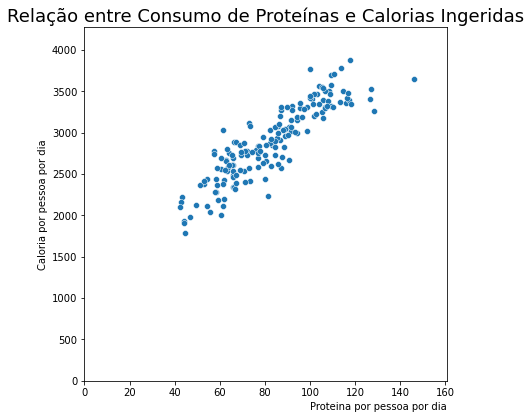

In [24]:
f, ax = plt.subplots(figsize=(6.5, 6.5))

ax.set_title('Relação entre Consumo de Proteínas e Calorias Ingeridas', fontsize=18)
ax.set_xlabel('Proteina por pessoa por dia', loc='right', fontsize=10)
ax.set_ylabel('Caloria por pessoa por dia', loc='center', fontsize=10)

ax.set_xlim(xmin=0, xmax=(dataFrame.Protein.max() * 1.1))
ax.set_ylim(ymin=0, ymax=(dataFrame.Calories.max() * 1.1))

sns.scatterplot(data=dataFrame, x='Protein', y='Calories', ax=ax)

plt.show()

<h3>Treino e Teste no mesmo dataset</h3>


In [25]:
dataFrame[dataFrame.Protein.isna() == True]
dataFrame.dropna(axis='index', inplace=True)
dataFrame.index = range(dataFrame.shape[0])
dataFrame

,Country,GDP,Protein,Calories
0,Afghanistan,2033.804443,55.520000,2040.000000
1,Albania,13317.092773,115.739998,3360.000000
2,Algeria,11630.679688,91.830002,3322.000000
3,Angola,6933.500000,53.049999,2385.000000
4,Antigua and Barbuda,21017.263672,80.190002,2445.000000
...,...,...,...,...
162,Vanuatu,3093.461426,63.950001,2607.000000
163,Vietnam,7585.943359,98.580002,3025.000000
164,World,16607.765625,82.865269,2928.399523
165,Zambia,3521.545898,60.529999,2002.000000


In [26]:
lr = LinearRegression().fit(X=dataFrame[['Protein']], y=dataFrame.Calories)
print(f'Coeficiente Angular: {lr.coef_[0].round(3)}')
print(f'Coeficiente Linear: {lr.intercept_.round(3)}')


Coeficiente Angular: 19.334
Coeficiente Linear: 1293.247


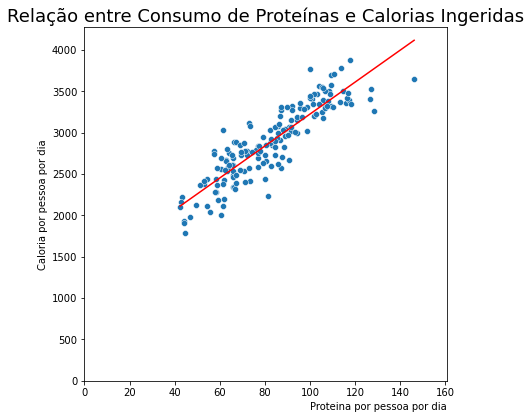

In [27]:
f, ax = plt.subplots(figsize=(6.5, 6.5))

ax.set_title('Relação entre Consumo de Proteínas e Calorias Ingeridas', fontsize=18)
ax.set_xlabel('Proteina por pessoa por dia', loc='right', fontsize=10)
ax.set_ylabel('Caloria por pessoa por dia', loc='center', fontsize=10)

ax.set_xlim(xmin=0, xmax=(dataFrame.Protein.max() * 1.1))
ax.set_ylim(ymin=0, ymax=(dataFrame.Calories.max() * 1.1))

sns.scatterplot(data=dataFrame, x='Protein', y='Calories', ax=ax)
sns.lineplot(x=dataFrame.Protein, y = lr.predict(dataFrame[['Protein']]), color="red")


plt.show()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(dataFrame[['Protein']], dataFrame.Calories, test_size=0.33, random_state=1234)

cal_pred = lr.predict(X_test)
cal_real = y_test



print(f'Coeficiente de Determinação :{r2_score(cal_real, cal_pred).round(2)}.')
print(f'Erro médio quadrático : {mean_squared_error(cal_real, cal_pred).round(2)}.')
print(f'Raiz do Erro médio quadrático : {np.sqrt(mean_squared_error(cal_real, cal_pred)).round(2)}.')
print(f'Media do consumo de Calorias: {np.round(np.mean(cal_real), 2)}')
print(f'Erro percentual do preditor: {np.round(np.sqrt(mean_squared_error(cal_real, cal_pred)) / np.mean(cal_real) * 100, 2)}%')



Coeficiente de Determinação :0.79.
Erro médio quadrático : 40288.99.
Raiz do Erro médio quadrático : 200.72.
Media do consumo de Calorias: 2834.42
Erro percentual do preditor: 7.08%


In [29]:
X_train, X_test, y_train, y_test = train_test_split(dataFrame[['Protein']], dataFrame.Calories, test_size=0.33, random_state=1234)

lr = LinearRegression().fit(X=X_train, y=y_train)
print(f'Coeficiente Angular: {lr.coef_[0].round(3)}')
print(f'Coeficiente Linear: {lr.intercept_.round(3)}')

Coeficiente Angular: 19.189
Coeficiente Linear: 1315.425


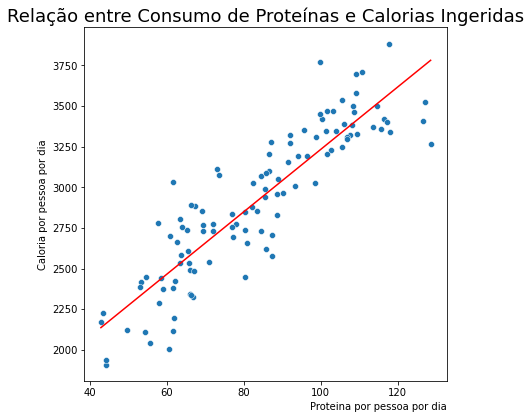

In [30]:
f, ax = plt.subplots(figsize=(6.5, 6.5))

ax.set_title('Relação entre Consumo de Proteínas e Calorias Ingeridas', fontsize=18)
ax.set_xlabel('Proteina por pessoa por dia', loc='right', fontsize=10)
ax.set_ylabel('Caloria por pessoa por dia', loc='center', fontsize=10)

sns.scatterplot(x=X_train.Protein, y=y_train, ax=ax)

sns.lineplot(x=X_train.Protein, y = lr.predict(X_train), color="red")

plt.show()

In [31]:
cal_pred = lr.predict(X_test)
cal_real = y_test


print(f'Coeficiente de Determinação :{r2_score(cal_real, cal_pred).round(2)}.')
print(f'Erro médio quadrático : {mean_squared_error(cal_real, cal_pred).round(2)}.')
print(f'Raiz do Erro médio quadrático : {np.sqrt(mean_squared_error(cal_real, cal_pred)).round(2)}.')
print(f'Media do consumo de Calorias: {np.round(np.mean(cal_real), 2)}')
print(f'Erro percentual do preditor: {np.round(np.sqrt(mean_squared_error(cal_real, cal_pred)) / np.mean(cal_real) * 100, 2)}%')


Coeficiente de Determinação :0.78.
Erro médio quadrático : 40848.09.
Raiz do Erro médio quadrático : 202.11.
Media do consumo de Calorias: 2834.42
Erro percentual do preditor: 7.13%


In [32]:
dataError= pd.DataFrame(X_test)
dataError['Cal_Real'] = y_test
dataError['Cal_Predict'] = cal_pred

dataError['Error'] = dataError['Cal_Real'] - dataError['Cal_Predict']

dataError.index = range(dataError.shape[0])

dataError.head()

,Protein,Cal_Real,Cal_Predict,Error
0,58.160000,2285.0,2431.448384,-146.448384
1,59.130001,2188.0,2450.061587,-262.061587
2,81.290001,2235.0,2875.286399,-640.286399
3,106.559998,3503.0,3360.188459,142.811541
4,72.980003,2578.0,2715.827141,-137.827141


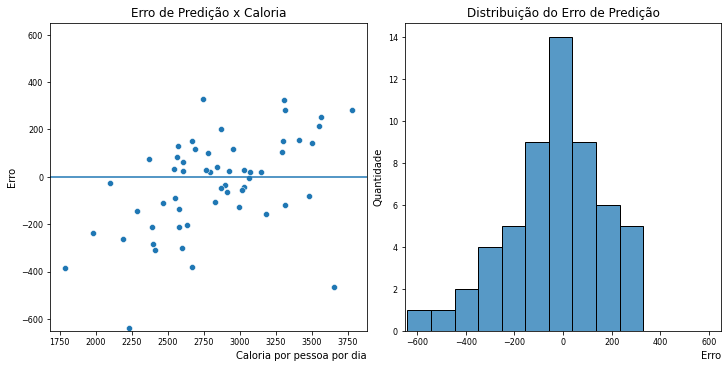

In [34]:
fig = plt.figure(constrained_layout=True)
gs = GridSpec(1, 2, figure=fig)
fig.set_size_inches(10,5)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

ax0.set_title('Erro de Predição x Caloria', fontsize=12)
ax0.set_xlabel('Caloria por pessoa por dia', loc='right', fontsize=10)
ax0.set_ylabel('Erro', loc='center', fontsize=10)
ax0.set_ylim(ymin=-650, ymax=650)
ax0.tick_params(labelsize=8)

ax0 = sns.scatterplot(x=dataError.Cal_Real, y= dataError.Error, ax=ax0)
ax0.axhline(0)


ax1.set_title('Distribuição do Erro de Predição', fontsize=12)
ax1.set_xlabel('Erro', loc='right', fontsize=10)
ax1.set_ylabel('Quantidade', loc='center', fontsize=10)
ax1.set_xlim(xmin=-650, xmax=650)
ax1.tick_params(labelsize=8)

sns.histplot(data=dataError, x="Error", bins=10, ax=ax1)

plt.show()